In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df = df.drop(['sepal_length','sepal_width'],axis='columns')
df

,petal_length,petal_width,species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df

,petal_length,petal_width,species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


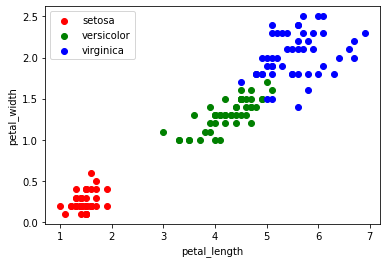

In [5]:
colors = ['red','green','blue']
labels = ['setosa','versicolor','virginica']
for i in range(3):
    plt.scatter(df[df.species==i]['petal_length'],df[df.species==i]['petal_width'],color=colors[i])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend(labels)

In [6]:
km = KMeans(n_clusters=3)
dfkm = df
dfkm['species'] = km.fit_predict(dfkm[['petal_length','petal_width']])
dfkm

,petal_length,petal_width,species
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


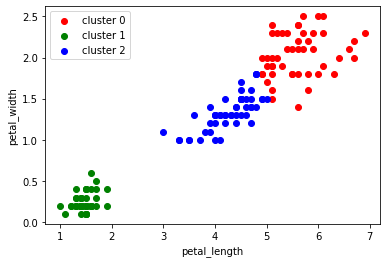

In [7]:
colors = ['red','green','blue']
labels = ['cluster 0','cluster 1','cluster 2']
for i in range(3):
    plt.scatter(df[df.species==i]['petal_length'],df[df.species==i]['petal_width'],color=colors[i])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend(labels)

In [8]:
sse_before_scaling = []
for n_cluster in range(1,21):
    km = KMeans(n_clusters=n_cluster)
    km.fit(df[['petal_length','petal_width']])
    sse_before_scaling.append(km.inertia_)
sse_before_scaling

[550.6434666666671,
 86.40394533570999,
 31.38775897435898,
 19.49352336396547,
 13.93330875790876,
 11.08484643186428,
 9.207570634920634,
 7.683419523446296,
 6.744031469979297,
 5.690451604093546,
 5.185383404437748,
 4.693457247261595,
 4.386483091787439,
 3.986858908780902,
 3.752103008103005,
 3.428520085649118,
 3.29410638511815,
 2.9591669110459424,
 2.707407415597818,
 2.5616648629148626]

In [9]:
scaler = MinMaxScaler()
scaler.fit(df[['petal_length']])
df[['petal_length']] = scaler.transform(df[['petal_length']])

scaler.fit(df[['petal_width']])
df[['petal_width']] = scaler.transform(df[['petal_width']])

df

,petal_length,petal_width,species
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,0
146,0.677966,0.750000,0
147,0.711864,0.791667,0
148,0.745763,0.916667,0


In [10]:
sse_after_scaling = []
for n_cluster in range(1,21):
    km = KMeans(n_clusters=n_cluster)
    km.fit(df[['petal_length','petal_width']])
    sse_after_scaling.append(km.inertia_)
sse_after_scaling

[28.391514358368717,
 5.179687509974783,
 1.7050986081225123,
 1.1647473293509736,
 0.8570856553216398,
 0.6827536831558554,
 0.5695414151358698,
 0.49022252495690866,
 0.4163585331282516,
 0.3676986746010011,
 0.3346363290734122,
 0.30372823103842833,
 0.27963638358313714,
 0.25344317276010286,
 0.23582828715466628,
 0.21384167431875065,
 0.2004084573008956,
 0.18876633857702949,
 0.1770625318927643,
 0.16234110121124698]

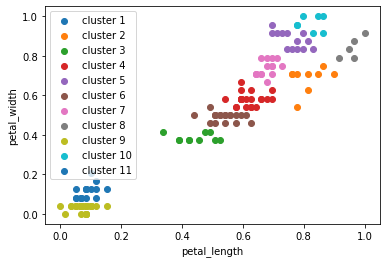

In [11]:
km = KMeans(n_clusters=10)
dfkm = df
dfkm['species'] = km.fit_predict(dfkm[['petal_length','petal_width']])

colors = ['red','green','blue']
labels = ['cluster ' + str(i) for i in range(1,21)]
for i in range(11):
    plt.scatter(df[df.species==i]['petal_length'],df[df.species==i]['petal_width'])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend(labels)

In [12]:
km = KMeans(n_clusters=102)
km.fit(df[['petal_length','petal_width']])
km.inertia_

5.546678239835239e-32

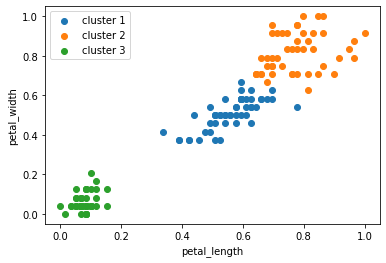

In [13]:
km = KMeans(n_clusters=3)
dfkm = df
dfkm['species'] = km.fit_predict(dfkm[['petal_length','petal_width']])

colors = ['red','green','blue']
labels = ['cluster ' + str(i) for i in range(1,4)]
for i in range(11):
    plt.scatter(df[df.species==i]['petal_length'],df[df.species==i]['petal_width'])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend(labels)

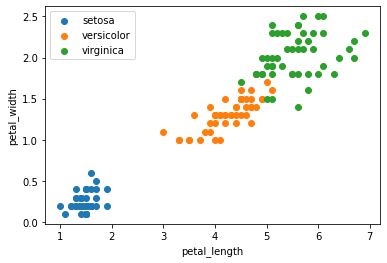

In [15]:
initdf = pd.read_csv('iris.csv')
initdf = initdf.drop(['sepal_length','sepal_width'],axis='columns')
initdf['species'] = le.fit_transform(initdf['species'])
colors = ['red','green','blue']
labels = ['setosa','versicolor','virginica']
for i in range(3):
    plt.scatter(initdf[initdf.species==i]['petal_length'],initdf[initdf.species==i]['petal_width'])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend(labels)